Designing a simple linear neural network


**Step 1: Imports**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
data = input_data.read_data_sets("data/MNIST/",one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [0]:
print("size of :")
print("Training set\t\t{}".format(len(data.train.labels)))
print("Test-set:\t\t{}".format(len(data.test.labels)))
print("validation-set\t\t{}".format(len(data.validation.labels)))

size of :
Training set		55000
Test-set:		10000
validation-set		5000


In [0]:
data.test.cls = np.array([i.argmax() for i in data.test.labels])
data.test.cls[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
# for practice purpose

def max(a):
  if a>=10:
    return a
    
marks = [50 , 89 ,9 , 78,89,2,99,67]  

ops = [ max(i) for i in marks]


In [0]:
# dimmension variables
img_size = 28

#images are stored in one dimension array 
img_size_flat = img_size*img_size

# height and width of the images
img_shape = (img_size,img_size)

num_classes =10



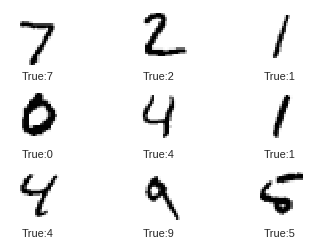

In [0]:
#helper function for plotting images

def plot_images(images,cls_true,cls_pred=None):
  #assert len(images) == len(cls_true) == 9
  
  #create figures with 3x3 sub-plots
  
  fig,axes,=plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.3,wspace=0.3)
  
  
  for i,ax in enumerate(axes.flat):
    
    #plot image
    
    ax.imshow(images[i].reshape(img_shape),cmap='binary')
    
    #show true and predicted classes:
    
    if cls_pred is None:
      xlabel = "True:{0}".format(cls_true[i])
    else:
      xlabel = "True:{0},Pred:{1}".format(cls_true[i],cls_pred[i])
      
    ax.set_xlabel(xlabel)
    
    #remove ticks form the plot
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    

#plotting images

#get the first 10 images
images = data.test.images[0:9]

#get the true classes of those images
cls_true = data.test.cls[0:10]


#plot the iamges and labels using the above functon

plot_images(images=images,cls_true=cls_true)


**GETTING STARTED WITH TENSORFLOW FORM HERE** 


 Placeholder variables

In [0]:

x = tf.placeholder(tf.float32,[None,img_size_flat])

y_true = tf.placeholder(tf.float32,[None,num_classes])

y_true_cls = tf.placeholder(tf.int64,[None])


In [0]:

#weights and biases .

weights = tf.Variable(tf.zeros([img_size_flat,num_classes]))

biases = tf.Variable(tf.zeros([num_classes]))


In [0]:
# Model 
# y = wrights*x + biases
 
logits = tf.matmul(x,weights) + biases 


In [0]:
# getting the labels 


y_pred = tf.nn.relu(logits)


tmp = session.run(y_pred,feed_dict=feed_dict_test)

print(tmp[0])

print("*******")

print(np.argmax(tmp[0],axis=0))



[ 0.5362286   0.          1.5206492   5.788773    0.          0.60290897
  0.         11.953764    0.          3.6324568 ]
*******
7


In [0]:
y_pred_cls = tf.argmax(y_pred,axis=1)

tmp = session.run(y_pred_cls,feed_dict=feed_dict_test)

print(tmp[0:10])

[7 2 1 0 4 1 4 9 6 9]


In [0]:
# cost - function to be optimzed
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

#cost function to make cost a single scalar value // calculate d average of cross entropy 

cost = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [0]:
# optimizer method

optimizer_1 = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
# note means means average 

correct_prediction = tf.equal(y_pred_cls,y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))  

In [0]:
#create tensorflow session
session = tf.Session()
#initialize variables
session.run(tf.initialize_all_variables())

batch_size =100

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:
#optimizer funtion


def optimizer(num_iterations):
  
  for i in range(num_iterations):
    
    x_batch,y_batch = data.train.next_batch(batch_size)
    
    
    #y_true_cls is only used  during testing
    
    feed_dict_train = {x:x_batch,y_true:y_batch}
    
    session.run(optimizer_1,feed_dict=feed_dict_train)


In [0]:
feed_dict_test = {x:data.test.images,y_true:data.test.labels,y_true_cls:data.test.cls}

In [0]:
def print_accuracy():
  
  acc = session.run(accuracy,feed_dict=feed_dict_test)
  
  print("Accuracy o test-set:{0:.4%}".format(acc))

In [0]:
print_accuracy()

Accuracy o test-set:9.8000%


In [0]:
optimizer(num_iterations=550)
print_accuracy()

Accuracy o test-set:91.5500%


In [0]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9]) 

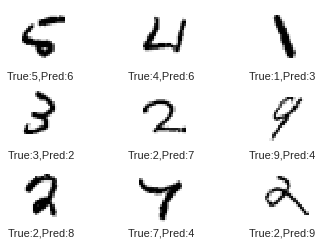

In [0]:
plot_example_errors()

Accuracy o test-set:92.1100%


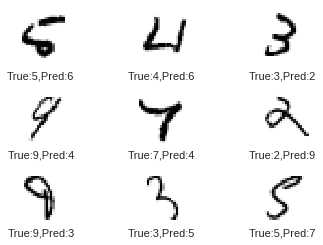

In [0]:
optimizer(num_iterations=500)
print_accuracy()
plot_example_errors()

In [0]:


import tensorflow as tf
import numpy as np

input_data = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([[0,1,1,0]])

# input data
data = tf.placeholder(tf.int32,[None,2])

# true output
y_true = tf.placeholder(tf.int32,[None,4])

#pred . y value

y_pred = tf.placeholder(tf.int32,[None])


#weights of layer 1
w1 = tf.Variable(tf.zeros(2,2))


#weights of layer 2
w2 = tf.Variable(tf.zeros(1,2))

#biases of layer 1
b1 = tf.Variable(tf.zeros(2,1))

#biases of layer 2
b2 = tf.Variable(tf.zeros(1,1))

#layer 1
h1 = tf.matmul(data,w1) + b1

a1 = tf.nn.sigmoid(h1)

h2 = tf.matmul(w2,a1) + b2

y_pred = tf.nn.sigmoid(h2)


# defining cost function 

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred,labels=y_true)

cost = tf.reduce_mean(cross_entropy)



#optimizer 

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.03).mimimize(cost)

session = tf.Session()

session.run(tf.initialize_all_variables)

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

feed_dict_train = {data:input_data,y_true:y}



session.run(optimizer,feed_dict=feed_dict_train)

#calculating accuracy
correct_prediction = tf.equal(y_pred,y_true)

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) 


acc = session.run(accuracy,feed_dict=feed_dict_train)
print("Accuracy o test-set:{0:.4%}".format(acc))
 


session.close()